# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this final lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the famous "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Build many linear models with the Boston housing data using OLS
* Analyze OLS diagnostics for model validity 
* Visually explain the results and interpret the diagnostics from Statsmodels 
* Comment on the goodness of fit for a simple regression model

## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

df = pd.read_csv('BostonHousing.csv')

The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.describe()

# Record your observations here 
# The independent variables describe desirable and non-desirable logistics about the houses that affect their value, 
# including environment (air quality), location (proximity to Charles river), age of house, crime rates, etc.

# Median Value of homes ranges from $50,000 to $500,000, with a mean value of $225,328.


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#crim: per capita crime rate by town.

#zn: proportion of residential land zoned for lots over 25,000 sq.ft.

#indus: proportion of non-retail business acres per town.

#chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#nox: nitrogen oxides concentration (parts per 10 million).

#rm: average number of rooms per dwelling.

#age: proportion of owner-occupied units built prior to 1940.

#dis: weighted mean of distances to five Boston employment centres.

#rad: index of accessibility to radial highways.

#tax: full-value property-tax rate per $10,000.

#ptratio: pupil-teacher ratio by town.

#black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#lstat: lower status of the population (percent).

#medv: median value of owner-occupied homes in $1000s.

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

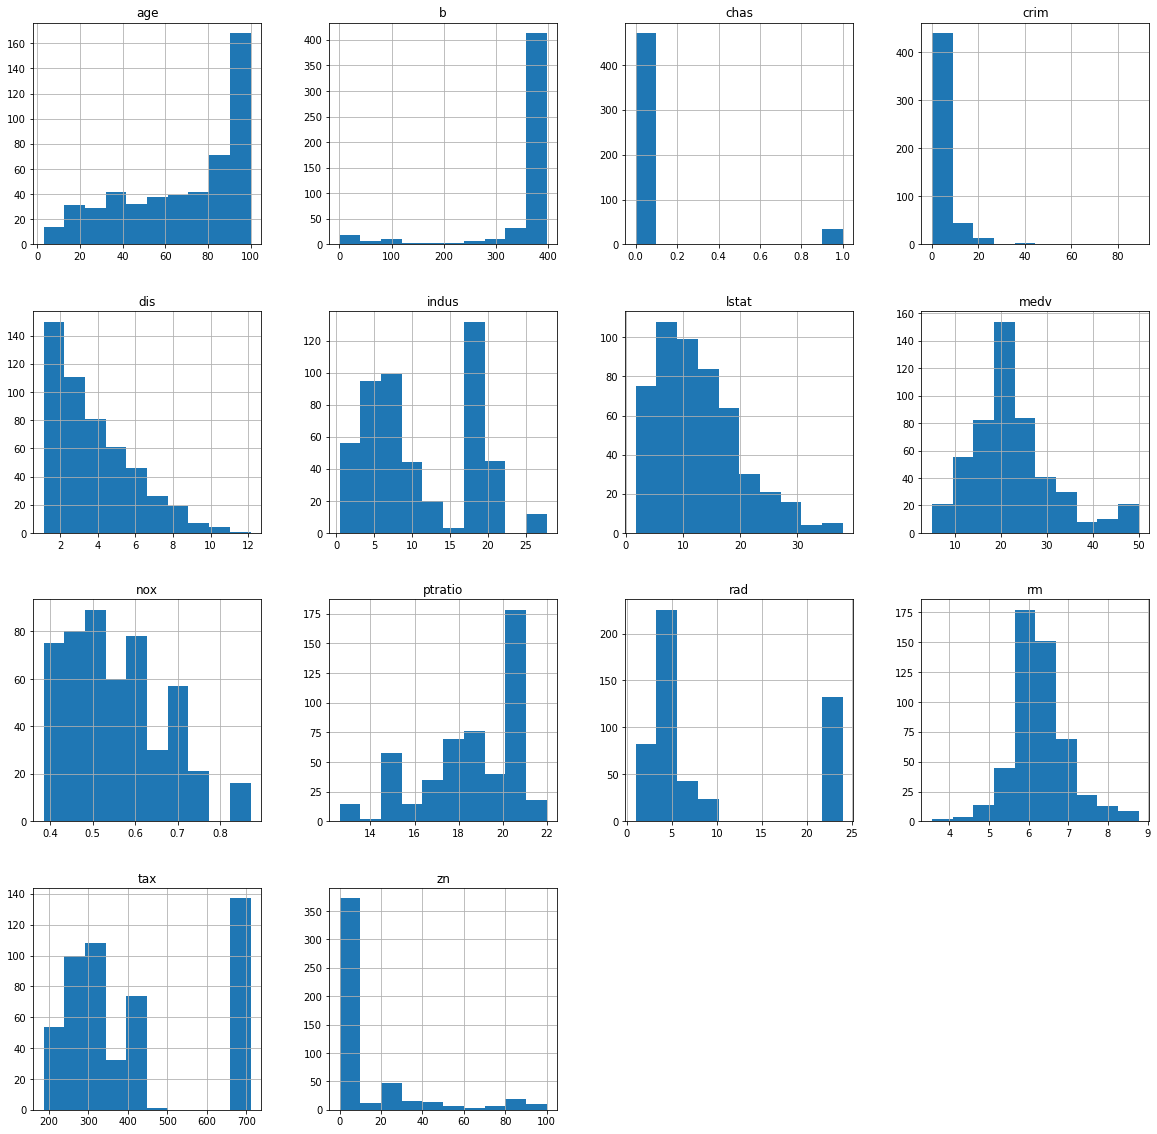

In [5]:
# Your code here 
df.hist(figsize=(20,20));

In [6]:
# You observations here 
# rm and medv are the only variables that appear to have a normal distribution
# age and dis show positive linear correlation

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [10]:
df2 = pd.read_csv('BostonHousing.csv', usecols=['crim', 'dis', 'rm', 'zn', 'age', 'medv'])
df2.head()

,crim,zn,rm,age,dis,medv
0,0.00632,18.0,6.575,65.2,4.0900,24.0
1,0.02731,0.0,6.421,78.9,4.9671,21.6
2,0.02729,0.0,7.185,61.1,4.9671,34.7
3,0.03237,0.0,6.998,45.8,6.0622,33.4
4,0.06905,0.0,7.147,54.2,6.0622,36.2


### Check for linearity assumption for all chosen features with target variable using scatter plots

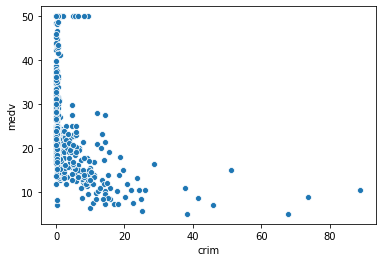

In [12]:
sns.scatterplot(x='crim', y ='medv', data = df2);

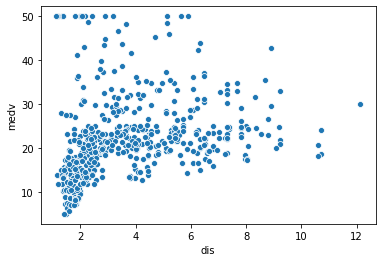

In [14]:
sns.scatterplot(x='dis', y ='medv', data = df2);

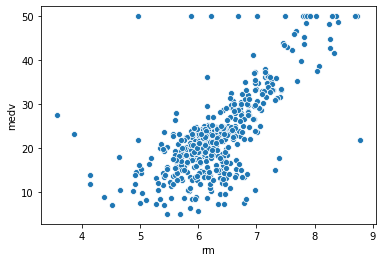

In [15]:
sns.scatterplot(x='rm', y ='medv', data = df2);

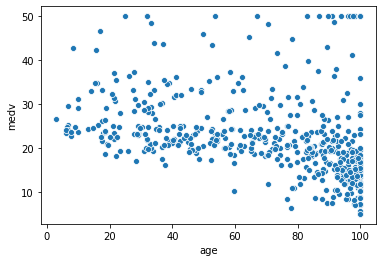

In [16]:
sns.scatterplot(x='age', y ='medv', data = df2);

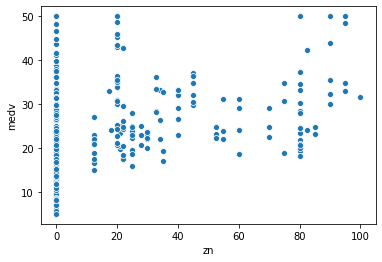

In [17]:
sns.scatterplot(x='zn', y ='medv', data = df2);

In [ ]:
# Your observations here 
# zn appears to be categorical 
# crim is heavily skewed
# rm distribution shows most linearity and normality

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll the dataset untouched and just move on with the regression. The assumptions are _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

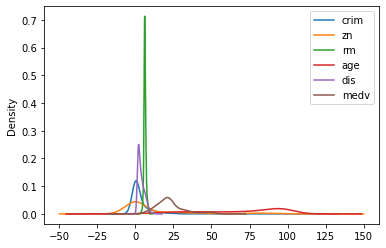

In [26]:
# Your code here
df2.plot.kde();

In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#f = 'medv~crim'
#f = 'medv~rm'
#f = 'medv~age'
#f = 'medv~dis'
f = 'medv~zn'
model = ols(formula=f, data=df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           5.71e-17
Time:                        16:30:18   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9176      0.425     49.248      0.000      20.083      21.752
zn             0.1421      0.016      8.675      0.000       0.110       0.174
==============================================================================
Omnibus:                      123.531   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.387
Skew:                           1.303   Prob(JB):                     1.06e-57
Kurtosis:                       5.378   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

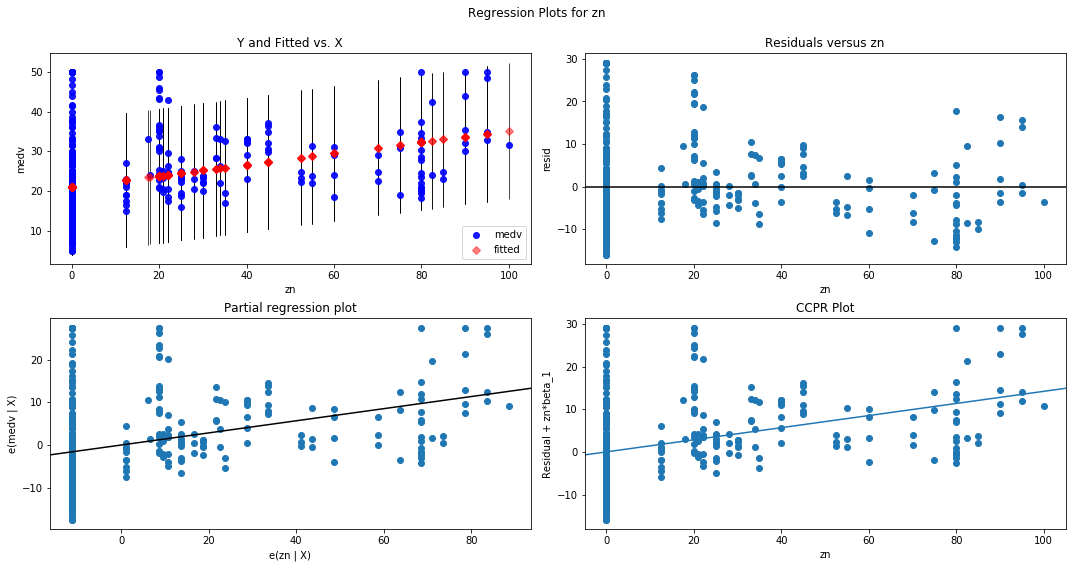

In [65]:
fig = plt.figure(figsize=(15,8))
#fig = sm.graphics.plot_regress_exog(model, "crim", fig=fig)
#fig = sm.graphics.plot_regress_exog(model, "rm", fig=fig)
#fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
#fig = sm.graphics.plot_regress_exog(model, "dis", fig=fig)
fig = sm.graphics.plot_regress_exog(model, "zn", fig=fig)
plt.show()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


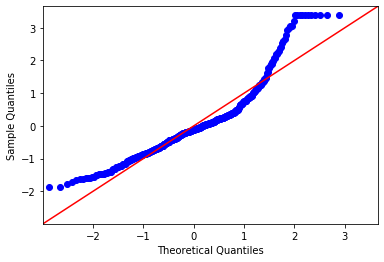

In [66]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [79]:
results = [
{'Independent Variable': 'crim',
 'r_squared': 0.151,
 'intercept': 24.0331,
 'slope': -0.4152,
 'p-value': 1.173987e-19,
 'normality (JB)': 7.14e-65
},
{'Independent Variable': 'rm',
'r_squared': 0.484,
'intercept': -34.6706,
'slope': 9.1021,
'p-value': 2.49e-74,
'normality (JB)': 1.02e-133
},
{
'Independent Variable': 'dis',
'r_squared': 0.062,
'intercept': 18.3901,
'slope': 1.0916,
'p-value': 1.21e-08,
'normality (JB)': 5.59e-67
},
{
'Independent Variable': 'age',
'r_squared': 0.142,
'intercept': 30.9787,
'slope': -0.1232,
'p-value': 1.57e-18,
'normality (JB)': 5.85e-100
},
{
'Independent Variable': 'zn',
'r_squared': 0.130,
'intercept': 20.9176,
'slope': 0.1421,
'p-value': 5.71e-17,
'normality (JB)': 1.06e-57 
}]

In [80]:
results

[{'Independent Variable': 'crim',
  'r_squared': 0.151,
  'intercept': 24.0331,
  'slope': -0.4152,
  'p-value': 1.173987e-19,
  'normality (JB)': 7.14e-65},
 {'Independent Variable': 'rm',
  'r_squared': 0.484,
  'intercept': -34.6706,
  'slope': 9.1021,
  'p-value': 2.49e-74,
  'normality (JB)': 1.02e-133},
 {'Independent Variable': 'dis',
  'r_squared': 0.062,
  'intercept': 18.3901,
  'slope': 1.0916,
  'p-value': 1.21e-08,
  'normality (JB)': 5.59e-67},
 {'Independent Variable': 'age',
  'r_squared': 0.142,
  'intercept': 30.9787,
  'slope': -0.1232,
  'p-value': 1.57e-18,
  'normality (JB)': 5.85e-100},
 {'Independent Variable': 'zn',
  'r_squared': 0.13,
  'intercept': 20.9176,
  'slope': 0.1421,
  'p-value': 5.71e-17,
  'normality (JB)': 1.06e-57}]

In [78]:
pd.DataFrame(results)

,Independent Variable,intercept,normality (JB),p-value,r_squared,slope
0,crim,24.0331,7.140000e-65,1.173987e-19,0.151,-0.4152
1,rm,-34.6706,1.020000e-133,2.490000e-74,0.484,9.1021
2,dis,18.3901,5.590000e-67,1.210000e-08,0.062,1.0916
3,age,30.9787,5.850000e-100,1.570000e-18,0.142,-0.1232
4,zn,20.9176,1.060000e-57,5.710000e-17,0.130,0.1421


In [ ]:
#Your observations here 

# Best predictor is RM, as it has the best R-Squared value of 0.484.



Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is uour best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore at multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.